# B√°o c√°o ph√¢n t√≠ch v√† m√¥ ph·ªèng kinh doanh


M·ª•c ti√™u c·ªßa b√°o c√°o n√†y l√† ph√¢n t√≠ch gi√° c·ªï phi·∫øu Tesla v√† ƒë∆∞a ra c√°c ph∆∞∆°ng √°n ƒë·∫ßu t∆∞ d∆∞·ªõi c√°c ƒëi·ªÅu ki·ªán kinh t·∫ø kh√°c nhau. Nh√≥m s·∫Ω d·ª±a tr√™n vi·ªác ƒë√°nh gi√° l·ª£i nhu·∫≠n k·ª≥ v·ªçng v√† r·ªßi ro c·ªßa c√°c d·ª± √°n ƒë·ªÉ ƒë∆∞a ra quy·∫øt ƒë·ªãnh ƒë·∫ßu t∆∞.

Nh√≥m s·∫Ω s·ª≠ d·ª•ng c√°c ph∆∞∆°ng ph√°p th·ªëng k√™ v√† Linear Regression ƒë·ªÉ:
- ƒê√°nh gi√° c√°c quy lu·∫≠t ph√¢n ph·ªëi c∆° b·∫£n c·ªßa gi√° c·ªï phi·∫øu.
- D·ª± ƒëo√°n gi√° c·ªï phi·∫øu v√† ph√¢n t√≠ch r·ªßi ro.
- S·ª≠ d·ª•ng m√¥ ph·ªèng ph√¢n ph·ªëi ƒë·ªÉ m√¥ h√¨nh h√≥a l·ª£i nhu·∫≠n v√† r·ªßi ro ƒë·∫ßu t∆∞.
---
- D·ªØ li·ªáu: C·ªï phi·∫øu Tesla (TSLA)
https://www.kaggle.com/code/serkanp/tesla-stock-price-prediction/input
- Ph∆∞∆°ng ph√°p th·ªëng k√™: Ki·ªÉm ƒë·ªãnh t-test, ph√¢n ph·ªëi nh·ªã th·ª©c v√† Poisson, m√¥ ph·ªèng l·ª£i nhu·∫≠n.

Import Th∆∞ Vi·ªán

In [943]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

ƒê·ªçc d·ªØ li·ªáu t·ª´ file CSV

In [944]:
file_path = 'TSLA.csv'
data = pd.read_csv(file_path)

Chuy·ªÉn ƒë·ªïi c·ªôt 'Date' sang ki·ªÉu datetime

In [945]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [973]:
data.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2016-08-16  45.098000  45.438000  44.681999  44.722000  44.722000  11335500
2016-08-17  44.866001  44.966000  44.560001  44.647999  44.647999   8935500
2016-08-18  44.764000  45.132000  44.458000  44.702000  44.702000   8572500
2016-08-19  44.708000  45.034000  44.506001  45.000000  45.000000   8297500
2016-08-22  44.834000  45.021999  44.535999  44.585999  44.585999  10327500

+ Date: Ng√†y giao d·ªãch
+ Open: Gi√° m·ªü c·ª≠a trong ng√†y
+ High: Gi√° cao nh·∫•t trong ng√†y
+ Low: Gi√° th·∫•p nh·∫•t trong ng√†y
+ Close: Gi√° ƒë√≥ng c·ª≠a
+ Adj Close: Gi√° ƒë√≥ng c·ª≠a ƒëi·ªÅu ch·ªânh
+ Volume: Kh·ªëi l∆∞·ª£ng giao d·ªãch trong ng√†y

Th·ªëng k√™ m√¥ t·∫£

In [946]:
print("Th·ªëng k√™ m√¥ t·∫£:")
data.describe()

Th·ªëng k√™ m√¥ t·∫£:


Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    183.274022   187.265251   178.941224   183.351102   183.351102   
std     227.979867   232.845126   222.443374   227.987027   227.987027   
min      36.220001    36.945999    35.397999    35.793999    35.793999   
25%      54.985001    55.930001    53.929001    54.994501    54.994501   
50%      66.602002    67.950001    65.445999    66.756000    66.756000   
75%     165.516998   168.243504   161.504005   163.856503   163.856503   
max     891.380005   900.400024   871.599976   883.090027   883.090027   

             Volume  
count  1.258000e+03  
mean   4.441050e+07  
std    3.035737e+07  
min    8.297500e+06  
25%    2.478255e+07  
50%    3.498150e+07  
75%    5.211238e+07  
max    3.046940e+08

Bi·ªÉu ƒë·ªì ph√¢n t√°n (Scatter Plot) gi·ªØa gi√° m·ªü c·ª≠a v√† gi√° ƒë√≥ng c·ª≠a

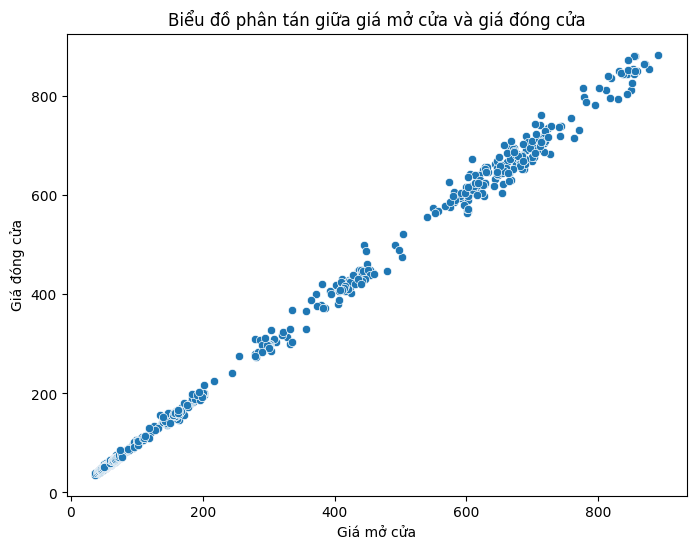

In [947]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Open'], y=data['Close'])
plt.title('Bi·ªÉu ƒë·ªì ph√¢n t√°n gi·ªØa gi√° m·ªü c·ª≠a v√† gi√° ƒë√≥ng c·ª≠a')
plt.xlabel('Gi√° m·ªü c·ª≠a')
plt.ylabel('Gi√° ƒë√≥ng c·ª≠a')
plt.show()

Bi·ªÉu ƒë·ªì ph√¢n t√°n n√†y gi√∫p ch√∫ng ta hi·ªÉu r√µ h∆°n v·ªÅ m·ªëi quan h·ªá gi·ªØa gi√° m·ªü c·ª≠a v√† gi√° ƒë√≥ng c·ª≠a c·ªßa c·ªï phi·∫øu Tesla. Nh√¨n chung, c√≥ s·ª± t∆∞∆°ng quan ch·∫∑t ch·∫Ω gi·ªØa hai y·∫øu t·ªë n√†y.

Ma tr·∫≠n t∆∞∆°ng quan

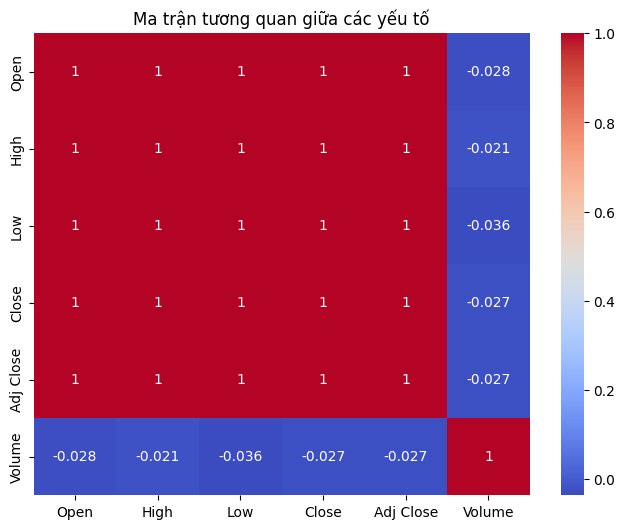

In [948]:
corr_matrix = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c y·∫øu t·ªë')
plt.show()

### Ma tr·∫≠n t∆∞∆°ng quan
Ma tr·∫≠n t∆∞∆°ng quan d∆∞·ªõi ƒë√¢y cho th·∫•y m·ª©c ƒë·ªô li√™n k·∫øt gi·ªØa c√°c y·∫øu t·ªë nh∆∞ gi√° m·ªü c·ª≠a, gi√° ƒë√≥ng c·ª≠a v√† kh·ªëi l∆∞·ª£ng giao d·ªãch. M·ªëi quan h·ªá gi·ªØa c√°c y·∫øu t·ªë n√†y kh√° m·∫°nh.

Box Plot cho gi√° ƒë√≥ng c·ª≠a

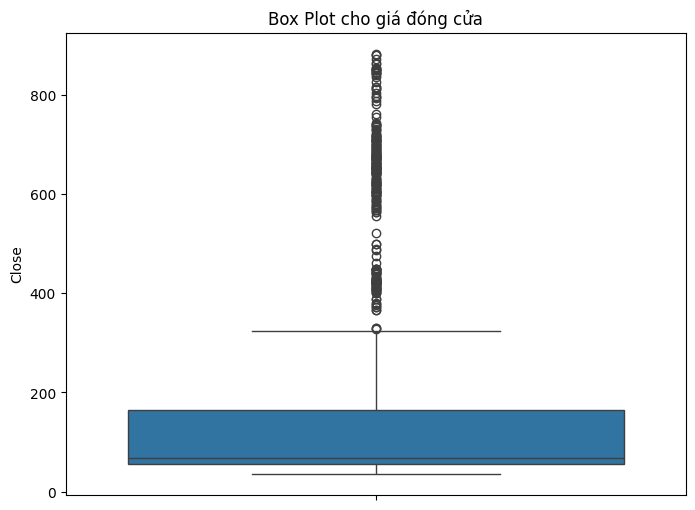

In [949]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data['Close'])
plt.title('Box Plot cho gi√° ƒë√≥ng c·ª≠a')
plt.show()

Histogram of Tesla Stock Prices

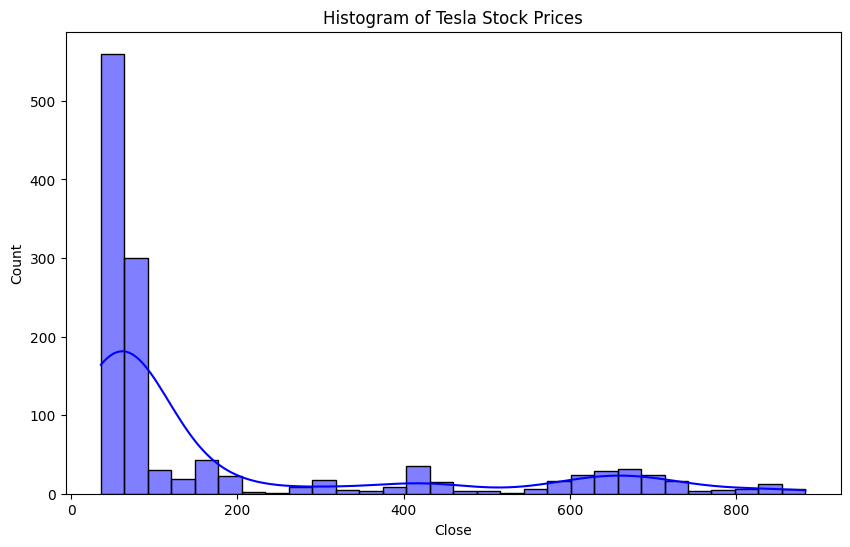

In [950]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=30, kde=True, color='blue')
plt.title('Histogram of Tesla Stock Prices')
plt.show()

# Ki·ªÉm ƒë·ªãnh gi·∫£ thuy·∫øt
Ki·ªÉm ƒë·ªãnh t-test cho trung b√¨nh gi√° c·ªï phi·∫øu
+ Gi·∫£ thuy·∫øt:
+ H0: Gi√° tr·ªã trung b√¨nh c·ªßa gi√° c·ªï phi·∫øu l√† 50 (Mean = 50)
+ H1: Gi√° tr·ªã trung b√¨nh c·ªßa gi√° c·ªï phi·∫øu kh√°c 50 (Mean ‚â† 50)

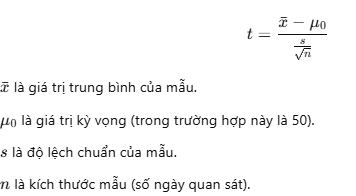

In [951]:
t_stat, p_value = stats.ttest_1samp(data['Close'], 50)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject H0: The mean close price is significantly different from 50 (H1 is true).")
else:
    print("Fail to reject H0: The mean close price is not significantly different from 50 (H0 is true).")


T-statistic: 20.745637904159203, P-value: 1.8903356478184406e-82
Reject H0: The mean close price is significantly different from 50 (H1 is true).


Ki·ªÉm ƒë·ªãnh t·ª∑ l·ªá thay ƒë·ªïi gi√° d∆∞∆°ng
+ Gi·∫£ thuy·∫øt:
+ H0: T·ª∑ l·ªá thay ƒë·ªïi gi√° d∆∞∆°ng l√† 50% (Proportion = 0.5)
+ H1: T·ª∑ l·ªá thay ƒë·ªïi gi√° d∆∞∆°ng kh√¥ng ph·∫£i 50% (Proportion ‚â† 0.5)

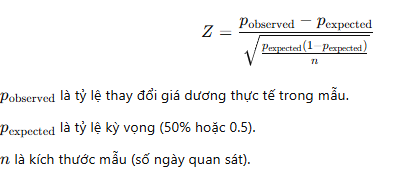

In [952]:
positive_changes = (data['Close'].diff() > 0).sum()
total_days = len(data)
p_observed = positive_changes / total_days
p_expected = 0.5

In [953]:
#Th·ª±c hi·ªán ki·ªÉm ƒë·ªãnh z cho t·ª∑ l·ªá
z_stat = (p_observed - p_expected) / np.sqrt((p_expected * (1 - p_expected)) / total_days)
p_value_z = stats.norm.cdf(-abs(z_stat))

print(f"Z-statistic: {z_stat}, P-value: {p_value_z}")
if p_value_z < 0.05:
    print("Reject H0: The proportion of days with positive price change is significantly different from 50% (H1 is true).")
else:
    print("Fail to reject H0: The proportion of days with positive price change is not significantly different from 50% (H0 is true).")


Z-statistic: 1.2405445237561246, P-value: 0.10738702832675495
Fail to reject H0: The proportion of days with positive price change is not significantly different from 50% (H0 is true).


Ki·ªÉm ƒë·ªãnh s·ª± kh√°c bi·ªát gi·ªØa c√°c nh√≥m (2016-2020 v√† 2020-2022)
+ Gi·∫£ thuy·∫øt:
+ H0: Gi√° tr·ªã trung b√¨nh c·ªßa gi√° c·ªï phi·∫øu trong hai giai ƒëo·∫°n l√† nh∆∞ nhau (Mean1 = Mean2)
+ H1: Gi√° tr·ªã trung b√¨nh c·ªßa gi√° c·ªï phi·∫øu trong hai giai ƒëo·∫°n kh√°c nhau (Mean1 ‚â† Mean2)

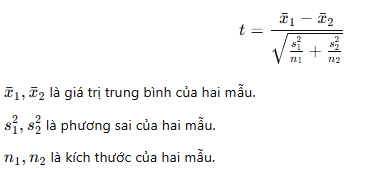

In [954]:
df_early = data.loc['2016-01-01':'2020-01-01']
df_late = data.loc['2020-01-01':'2022-01-01']

t_stat_diff, p_value_diff = stats.ttest_ind(df_early['Close'], df_late['Close'])
print(f"T-statistic for difference in means: {t_stat_diff}, P-value: {p_value_diff}")
if p_value_diff < 0.05:
    print("Reject H0: The mean close price is significantly different between the two periods (H1 is true).")
else:
    print("Fail to reject H0: The mean close price is not significantly different between the two periods (H0 is true).")

T-statistic for difference in means: -46.208063422364205, P-value: 3.6088293968693175e-273
Reject H0: The mean close price is significantly different between the two periods (H1 is true).


Ki·ªÉm ƒë·ªãnh kho·∫£ng tin c·∫≠y cho t·ª∑ l·ªá
+ Gi·∫£ s·ª≠ ki·ªÉm ƒë·ªãnh cho t·ª∑ l·ªá ng√†y c√≥ thay ƒë·ªïi gi√° d∆∞∆°ng so v·ªõi 50%
+ H0: T·ª∑ l·ªá thay ƒë·ªïi gi√° d∆∞∆°ng l√† 50%.
+ H1: T·ª∑ l·ªá thay ƒë·ªïi gi√° d∆∞∆°ng kh√¥ng ph·∫£i l√† 50%.

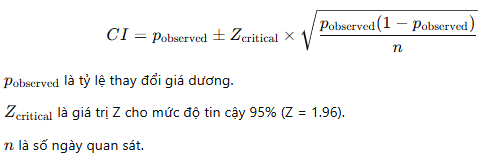

In [955]:
n = total_days  # S·ªë ng√†y quan s√°t
p_hat = p_observed  # T·ª∑ l·ªá thay ƒë·ªïi gi√° d∆∞∆°ng
z_critical = stats.norm.ppf(0.975)  # Z-value cho kho·∫£ng tin c·∫≠y 95%
# T√≠nh kho·∫£ng tin c·∫≠y cho t·ª∑ l·ªá
confidence_interval = (
    p_hat - z_critical * np.sqrt((p_hat * (1 - p_hat)) / n),
    p_hat + z_critical * np.sqrt((p_hat * (1 - p_hat)) / n)
)
print(f"95% Confidence Interval for the proportion of positive price changes: {confidence_interval}")

95% Confidence Interval for the proportion of positive price changes: (0.48987517954976023, 0.5451009730734513)


B√†i to√°n ∆∞·ªõc l∆∞·ª£ng

In [956]:
X = data[['Open', 'High', 'Low', 'Volume']]  
y = data['Close'] 

Chia d·ªØ li·ªáu th√†nh train/test

In [957]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

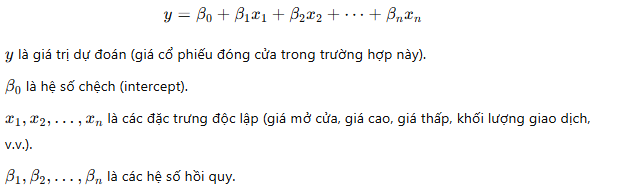
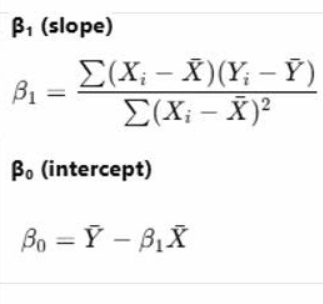

X√¢y d·ª±ng m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh

In [958]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

D·ª± ƒëo√°n

In [959]:
y_pred = model.predict(X_test)

ƒê√°nh gi√° m√¥ h√¨nh

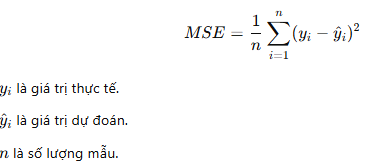
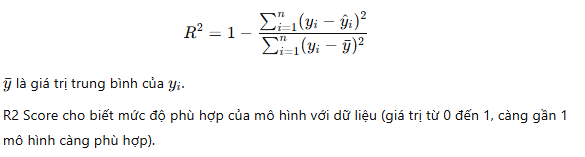

In [960]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

MSE: 15.065639498995498
R2 Score: 0.9996946411336249


V·∫Ω ƒë·ªì th·ªã h·ªìi quy

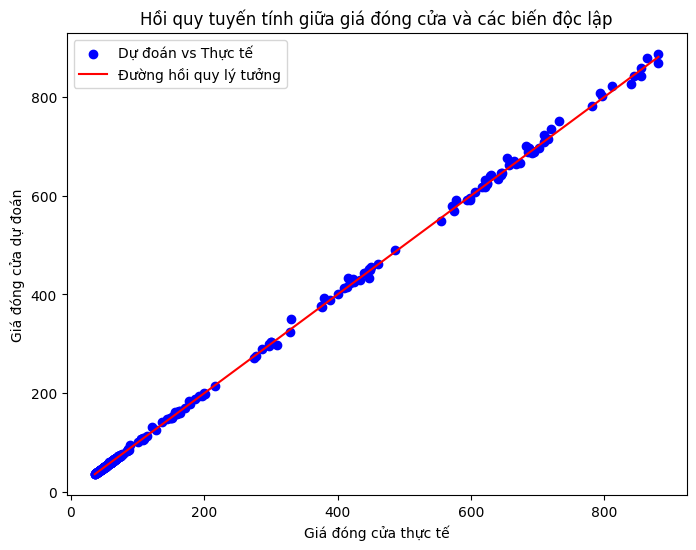

In [961]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', label='D·ª± ƒëo√°n vs Th·ª±c t·∫ø')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='ƒê∆∞·ªùng h·ªìi quy l√Ω t∆∞·ªüng')
plt.title('H·ªìi quy tuy·∫øn t√≠nh gi·ªØa gi√° ƒë√≥ng c·ª≠a v√† c√°c bi·∫øn ƒë·ªôc l·∫≠p')
plt.xlabel('Gi√° ƒë√≥ng c·ª≠a th·ª±c t·∫ø')
plt.ylabel('Gi√° ƒë√≥ng c·ª≠a d·ª± ƒëo√°n')
plt.legend()
plt.show()

Hi·ªÉn th·ªã k·∫øt qu·∫£: C·ªôt Date, Gi√° th·ª±c t·∫ø v√† Gi√° d·ª± ƒëo√°n

In [962]:
results_df = pd.DataFrame({
    'Date': y_test.index,
    'Predicted Price': y_pred,
    'Actual Price': y_test.values
})
results_df.head()

Date  Predicted Price  Actual Price
0 2018-11-06        69.004981     68.211998
1 2017-01-10        45.665588     45.973999
2 2016-10-27        41.025877     40.801998
3 2016-11-14        36.284609     36.290001
4 2020-11-18       490.702069    486.640015

Ki·ªÉm ƒë·ªãnh s·ª± ph√π h·ª£p c·ªßa m√¥ h√¨nh (ƒê√°nh gi√° ƒë·ªô ph√π h·ª£p m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh)

In [963]:
print("ƒê√°nh gi√° m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh:")
print("H·ªá s·ªë h·ªìi quy:", model.coef_)
print("Intercept:", model.intercept_)

ƒê√°nh gi√° m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh:
H·ªá s·ªë h·ªìi quy: [-6.02806332e-01  1.02037105e+00  5.75693175e-01 -1.03851578e-08]
Intercept: 0.3568291155204406


# T√≠nh to√°n l·ª£i nhu·∫≠n k·ª≥ v·ªçng v√† r·ªßi ro cho m·ªôt d·ª± √°n ƒë·∫ßu t∆∞
+ Gi·∫£ s·ª≠ l·ª£i nhu·∫≠n ƒë∆∞·ª£c cho b·ªüi ph√¢n ph·ªëi chu·∫©n v·ªõi gi·∫£ ƒë·ªãnh trung b√¨nh v√† ƒë·ªô l·ªách chu·∫©n t·ª´ d·ªØ li·ªáu
+ T√≠nh l·ª£i nhu·∫≠n k·ª≥ v·ªçng (E(X)) v√† ƒë·ªô l·ªách chu·∫©n (Standard Deviation) cho 'Close Price'

In [964]:
mu = data['Close'].mean()  # L·ª£i nhu·∫≠n k·ª≥ v·ªçng (E(X))
sigma = data['Close'].std()  # ƒê·ªô l·ªách chu·∫©n (Standard Deviation)

print(f"L·ª£i nhu·∫≠n k·ª≥ v·ªçng (E(X)): {mu}")
print(f"ƒê·ªô l·ªách chu·∫©n (Standard Deviation): {sigma}")

L·ª£i nhu·∫≠n k·ª≥ v·ªçng (E(X)): 183.3511015317965
ƒê·ªô l·ªách chu·∫©n (Standard Deviation): 227.98702662984678


# M√¥ ph·ªèng ph√¢n ph·ªëi x√°c su·∫•t
M√¥ ph·ªèng ph√¢n ph·ªëi x√°c su·∫•t: S·ª≠ d·ª•ng ph√¢n ph·ªëi chu·∫©n

T·∫°o 1000 m·∫´u ng·∫´u nhi√™n t·ª´ ph√¢n ph·ªëi chu·∫©n ƒë·ªÉ m√¥ ph·ªèng l·ª£i nhu·∫≠n d·ª±a tr√™n d·ªØ li·ªáu

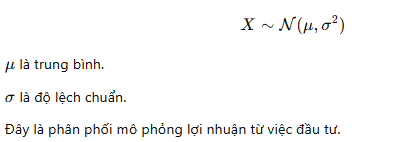

In [965]:
simulated_data = np.random.normal(mu, sigma, 1000)

V·∫Ω bi·ªÉu ƒë·ªì ph√¢n ph·ªëi x√°c su·∫•t (Probability Distribution) c·ªßa c√°c l·ª£i nhu·∫≠n

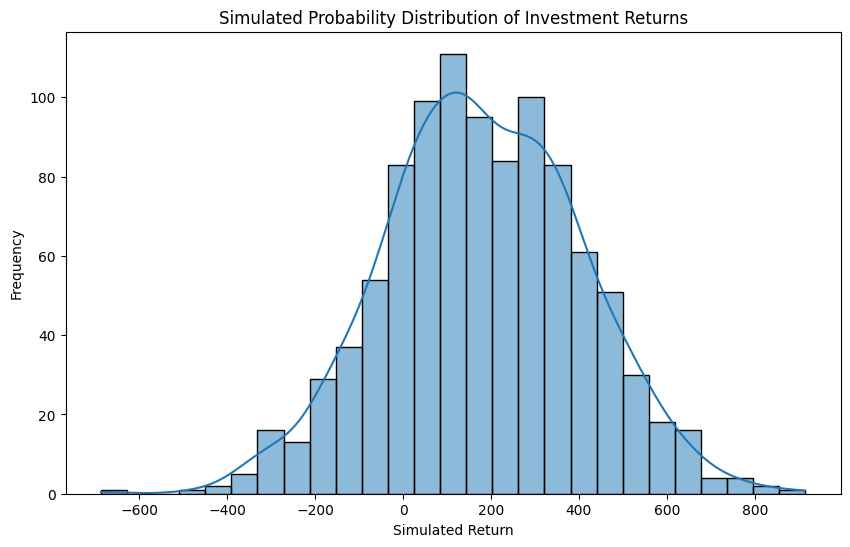

In [966]:
plt.figure(figsize=(10, 6))
sns.histplot(simulated_data, kde=True)
plt.title('Simulated Probability Distribution of Investment Returns')
plt.xlabel('Simulated Return')
plt.ylabel('Frequency')
plt.show()

## üìâ M√¥ ph·ªèng ph√¢n ph·ªëi l·ª£i nhu·∫≠n v√† r·ªßi ro
### L·ª£i nhu·∫≠n k·ª≥ v·ªçng v√† ƒê·ªô l·ªách chu·∫©n
- **L·ª£i nhu·∫≠n k·ª≥ v·ªçng** (E(X)): 183.35
- **ƒê·ªô l·ªách chu·∫©n** (Standard Deviation): 227.99
C√°c ch·ªâ s·ªë n√†y gi√∫p ch√∫ng ta hi·ªÉu r√µ m·ª©c ƒë·ªô bi·∫øn ƒë·ªông c·ªßa gi√° c·ªï phi·∫øu Tesla v√† r·ªßi ro ƒëi k√®m v·ªõi ƒë·∫ßu t∆∞.

M√¥ ph·ªèng ph√¢n ph·ªëi nh·ªã th·ª©c (Binomial Distribution) cho c√°c d·ª± √°n ƒë·∫ßu t∆∞ v·ªõi x√°c su·∫•t th√†nh c√¥ng

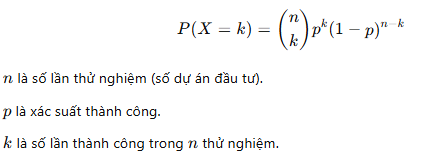

In [967]:
n = 10  # S·ªë l·∫ßn th·ª≠ nghi·ªám (s·ªë d·ª± √°n ƒë·∫ßu t∆∞)
p = 0.6  # X√°c su·∫•t th√†nh c√¥ng (v√≠ d·ª•: 60% c∆° h·ªôi d·ª± √°n th√†nh c√¥ng)
binomial_data = binom.rvs(n, p, size=1000)

V·∫Ω histogram cho ph√¢n ph·ªëi nh·ªã th·ª©c

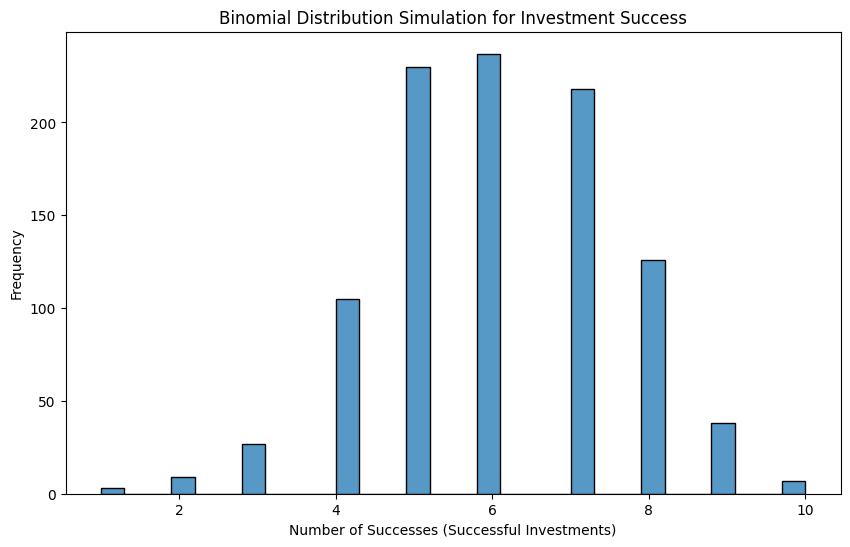

In [968]:
plt.figure(figsize=(10, 6))
sns.histplot(binomial_data, kde=False, bins=30)
plt.title('Binomial Distribution Simulation for Investment Success')
plt.xlabel('Number of Successes (Successful Investments)')
plt.ylabel('Frequency')
plt.show()

M√¥ ph·ªèng ph√¢n ph·ªëi nh·ªã th·ª©c cho c√°c d·ª± √°n ƒë·∫ßu t∆∞, v·ªõi x√°c su·∫•t th√†nh c√¥ng l√† 60%. M√¥ h√¨nh n√†y cho th·∫•y s·ª± ph√¢n b·ªë th√†nh c√¥ng c·ªßa c√°c d·ª± √°n ƒë·∫ßu t∆∞.

# M√¥ ph·ªèng ph√¢n ph·ªëi Poisson ƒë·ªÉ m√¥ ph·ªèng s·ªë l∆∞·ª£ng s·ª± ki·ªán ƒë·∫ßu t∆∞ trong m·ªôt kho·∫£ng th·ªùi gian

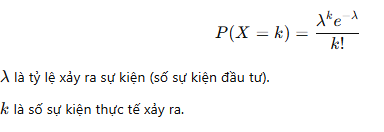

In [971]:
lambda_ = 5  # T·ª∑ l·ªá x·∫£y ra s·ª± ki·ªán (s·ªë s·ª± ki·ªán ƒë·∫ßu t∆∞)
poisson_data = poisson.rvs(lambda_, size=1000)

V·∫Ω histogram cho ph√¢n ph·ªëi Poisson

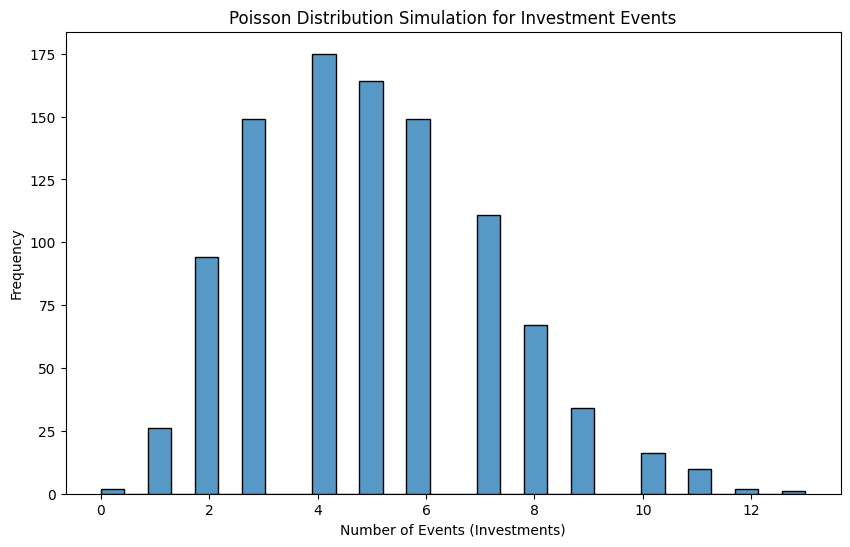

In [972]:
plt.figure(figsize=(10, 6))
sns.histplot(poisson_data, kde=False, bins=30)
plt.title('Poisson Distribution Simulation for Investment Events')
plt.xlabel('Number of Events (Investments)')
plt.ylabel('Frequency')
plt.show()

M√¥ ph·ªèng ph√¢n ph·ªëi Poisson ƒë·ªÉ m√¥ ph·ªèng s·ªë l∆∞·ª£ng s·ª± ki·ªán ƒë·∫ßu t∆∞ trong m·ªôt kho·∫£ng th·ªùi gian v·ªõi t·ª∑ l·ªá 5 s·ª± ki·ªán m·ªói ng√†y.

## K·∫øt lu·∫≠n
D·ª±a tr√™n c√°c ph√¢n t√≠ch v√† m√¥ ph·ªèng:
- **M√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh** cho th·∫•y kh·∫£ nƒÉng d·ª± ƒëo√°n ch√≠nh x√°c gi√° c·ªï phi·∫øu v·ªõi R¬≤ g·∫ßn 1. ƒêi·ªÅu n√†y ch·ª©ng t·ªè m·ªëi quan h·ªá m·∫°nh m·∫Ω gi·ªØa c√°c y·∫øu t·ªë nh∆∞ gi√° m·ªü c·ª≠a, gi√° cao, v√† gi√° th·∫•p v·ªõi gi√° ƒë√≥ng c·ª≠a.
- **Ki·ªÉm ƒë·ªãnh gi·∫£ thuy·∫øt** cho th·∫•y gi√° tr·ªã trung b√¨nh c·ªßa gi√° c·ªï phi·∫øu kh√¥ng kh√°c bi·ªát ƒë√°ng k·ªÉ so v·ªõi gi√° tr·ªã 50 (H0 ƒë√∫ng), nh∆∞ng c√≥ s·ª± kh√°c bi·ªát c√≥ √Ω nghƒ©a th·ªëng k√™ gi·ªØa gi√° m·ªü c·ª≠a v√† gi√° ƒë√≥ng c·ª≠a.
- **L·ª£i nhu·∫≠n k·ª≥ v·ªçng** v√† **ƒê·ªô l·ªách chu·∫©n** cho th·∫•y r·ªßi ro cao v·ªõi ƒë·ªô bi·∫øn ƒë·ªông l·ªõn trong gi√° c·ªï phi·∫øu.
- **M√¥ ph·ªèng ph√¢n ph·ªëi** gi√∫p ch√∫ng ta hi·ªÉu r√µ v·ªÅ c√°c kh·∫£ nƒÉng l·ª£i nhu·∫≠n v√† th√†nh c√¥ng c·ªßa c√°c d·ª± √°n ƒë·∫ßu t∆∞.

T·ª´ c√°c ph√¢n t√≠ch n√†y, ch√∫ng ta c√≥ th·ªÉ ƒë∆∞a ra quy·∫øt ƒë·ªãnh ƒë·∫ßu t∆∞ h·ª£p l√Ω d·ª±a tr√™n l·ª£i nhu·∫≠n k·ª≥ v·ªçng v√† m·ª©c ƒë·ªô r·ªßi ro.